You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( k
 -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation
from sklearn import metrics
from itertools import cycle

%matplotlib inline

Let's start by creating our centroids and our data.

Centers: [[2, -2], [3, -2], [-2, 2], [5, -5]]


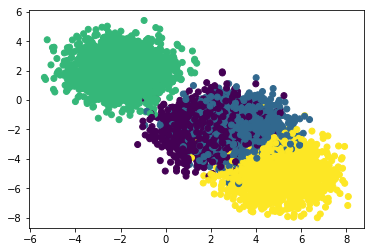

Centers: [[3, 3], [2, 5], [4, 4]]


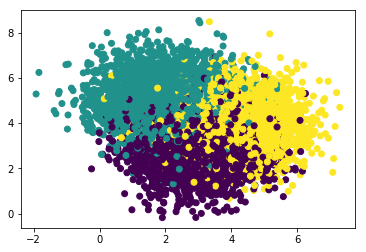

Centers: [[2, 2], [2, -5], [3, 6], [4, 4], [7, 7], [6, -5]]


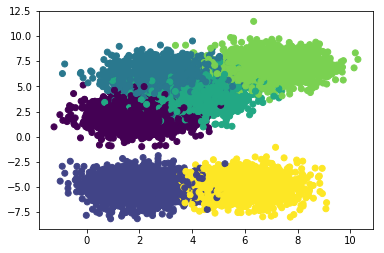

Centers: [[1, 1], [8, -8], [-3, -3], [5, 5]]


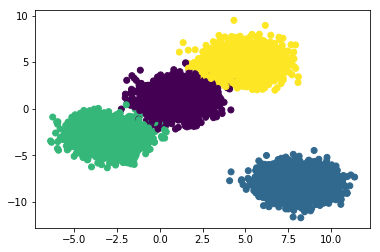

Centers: [[1, 1], [2, 2]]


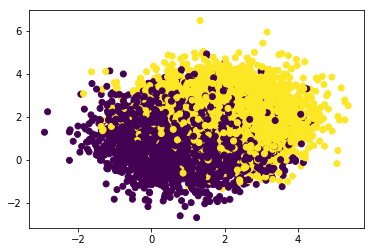

In [2]:
centers = [[[2, -2], [3, -2], [-2, 2], [5,-5]],
          [[3,3], [2,5], [4,4]],
          [[2,2], [2,-5], [3,6], [4,4], [7,7], [6,-5]],
          [[1,1], [8,-8], [-3,-3], [5,5]],
          [[1,1], [2,2]]]

for center in centers:
    X, y = make_blobs(
        n_samples=10000,
        centers=center,
        cluster_std=1,
        n_features=2,
        random_state=42)
    print('Centers:', center)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

We now have our selected centroids. Let's examine them using our four clustering methods, starting with K-Means.


Centers: [[2, -2], [3, -2], [-2, 2], [5, -5]]
Number of estimated clusters: 4


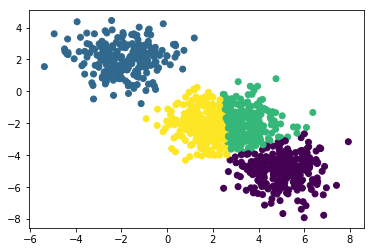

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        1    2   82  188
1       11    0  159   69
2        0  238    0    0
3      238    0   11    1

Centers: [[3, 3], [2, 5], [4, 4]]
Number of estimated clusters: 3


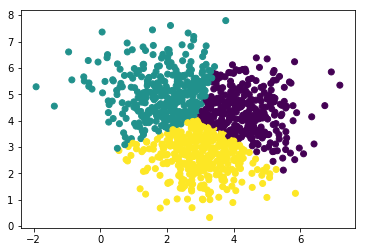

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       59   38  265
1       37  259   24
2      214   35   69

Centers: [[2, 2], [2, -5], [3, 6], [4, 4], [7, 7], [6, -5]]
Number of estimated clusters: 6


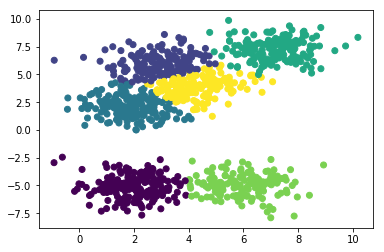

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5
row_0                              
0        0    0  163    0    0   13
1      180    0    0    0    6    0
2        0  128    4    3    0   16
3        0   26   12    0    0  131
4        0    1    0  161    0    3
5        3    0    0    0  150    0

Centers: [[1, 1], [8, -8], [-3, -3], [5, 5]]
Number of estimated clusters: 4


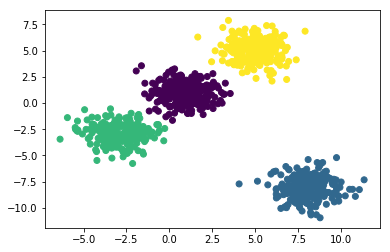

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0  239    0    0
2        2    0  236    0
3        0    0    0  250

Centers: [[1, 1], [2, 2]]
Number of estimated clusters: 2


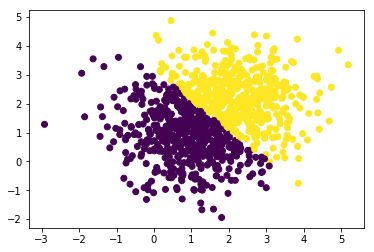

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      397  115
1      120  368


In [3]:

for center in centers:
    X, y = make_blobs(
        n_samples=10000,
        centers=center,
        cluster_std=1,
        n_features=2,
        random_state=42)

#Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)
    
    n_clusters = len(center)
    y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_train)


    
    print("\nCenters:", center)
    print("Number of estimated clusters: {}".format(n_clusters))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,y_pred))

K Means did a good job of clustering the information regardless of the centroids and amount of clusters. It is relatively easy to tell the clusters apart. Our cluster with 4 clusters looks the cleanest.

Now lets look at mean shift.


Centers: [[2, -2], [3, -2], [-2, 2], [5, -5]]
Number of estimated clusters: 3


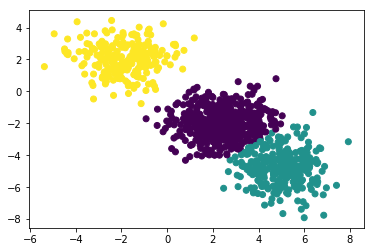

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      268    3    2
1      215   24    0
2        0    0  238
3        4  246    0

Centers: [[3, 3], [2, 5], [4, 4]]
Number of estimated clusters: 1


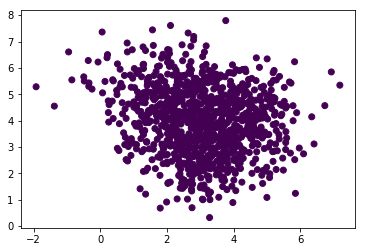

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      362
1      320
2      318

Centers: [[2, 2], [2, -5], [3, 6], [4, 4], [7, 7], [6, -5]]
Number of estimated clusters: 2


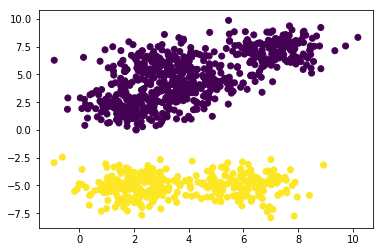

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      176    0
1        0  186
2      151    0
3      169    0
4      165    0
5        0  153

Centers: [[1, 1], [8, -8], [-3, -3], [5, 5]]
Number of estimated clusters: 4


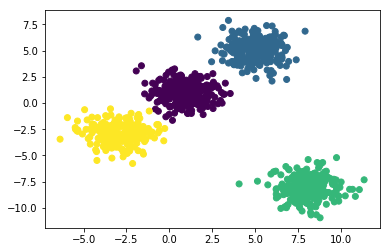

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0  239    0
2        1    0    0  237
3        0  250    0    0

Centers: [[1, 1], [2, 2]]
Number of estimated clusters: 1


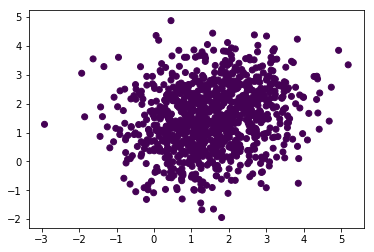

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      512
1      488


In [4]:
for center in centers:
    X, y = make_blobs(
        n_samples=10000,
        centers=center,
        cluster_std=1,
        n_features=2,
        random_state=42)

#Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)
    
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

# Extract cluster assignments for each data point.
    labels = ms.labels_

# Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

# Count our clusters.
    n_clusters_ = len(np.unique(labels))
    print("\nCenters:", center)
    print("Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))

Mean shift worked much different. It created one blob multiple times on the models with a smaller amount of centroids. However it looked to nicely cluster the models with a higher count of centroids leading me to believe finding a centroid balance is important with mean shift.

Next up is spectral clustering.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)



Centers: [[2, -2], [3, -2], [-2, 2], [5, -5]]
Number of estimated clusters: 4


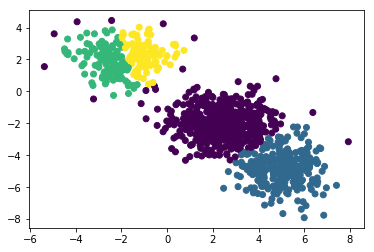

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      272    0    0    1
1      221   18    0    0
2       11    0  125  102
3        7  243    0    0

Centers: [[3, 3], [2, 5], [4, 4]]
Number of estimated clusters: 3


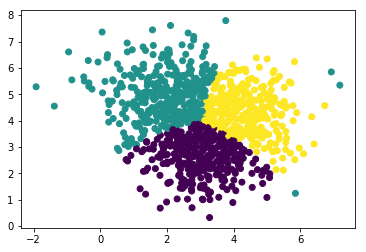

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      258   45   59
1       22  263   35
2       65   47  206

Centers: [[2, 2], [2, -5], [3, 6], [4, 4], [7, 7], [6, -5]]
Number of estimated clusters: 6


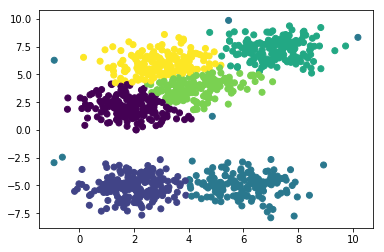

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5
row_0                              
0      160    0    0    0   15    1
1        0  178    8    0    0    0
2        3    0    1    3   14  130
3        8    0    1    0  132   28
4        0    0    2  157    4    2
5        0    3  150    0    0    0

Centers: [[1, 1], [8, -8], [-3, -3], [5, 5]]
Number of estimated clusters: 4


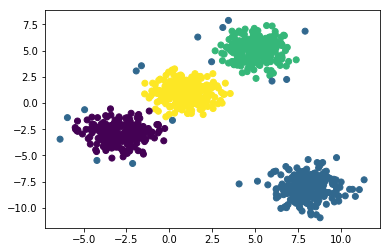

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0    2    0  271
1        0  239    0    0
2      232    6    0    0
3        0    7  243    0

Centers: [[1, 1], [2, 2]]
Number of estimated clusters: 2


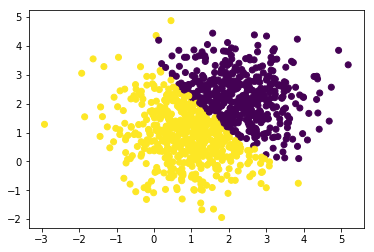

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      104  408
1      356  132


In [5]:
for center in centers:
    X, y = make_blobs(
        n_samples=10000,
        centers=center,
        cluster_std=1,
        n_features=2,
        random_state=42)

#Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)
    
    
# We know we're looking for three clusters.
    n_clusters = len(center)

# Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

#Predicted clusters.
    predict=sc.fit_predict(X_train)

    
    print("\nCenters:", center)
    print("Number of estimated clusters: {}".format(n_clusters))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))

Our spectral clustering model didn't do very well. It has a lot of data that looks like it didn't fit anywhere, so it was just thrown into a group. It did better on a smaller amount of centroids suggesting it works better on lower dimensional data.

Affinity propagation is next.


Centers: [[2, -2], [3, -2], [-2, 2], [5, -5]]
Number of estimated clusters: 31


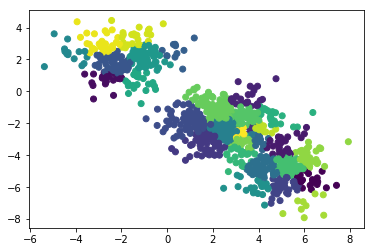


Centers: [[3, 3], [2, 5], [4, 4]]
Number of estimated clusters: 38


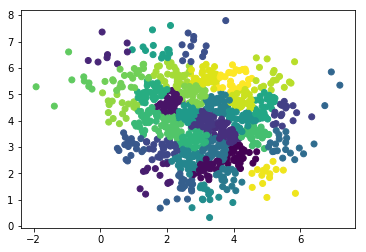


Centers: [[2, 2], [2, -5], [3, 6], [4, 4], [7, 7], [6, -5]]
Number of estimated clusters: 169


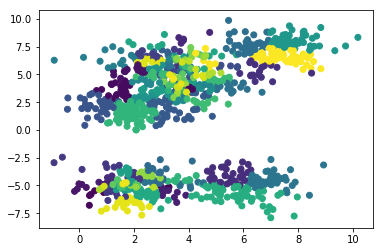


Centers: [[1, 1], [8, -8], [-3, -3], [5, 5]]
Number of estimated clusters: 63

Centers: [[1, 1], [2, 2]]
Number of estimated clusters: 40


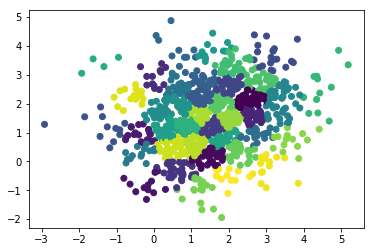

In [6]:
for center in centers:
    X, y = make_blobs(
        n_samples=10000,
        centers=center,
        cluster_std=1,
        n_features=2,
        random_state=42)

#Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)
    
    
# We know we're looking for three clusters.
    n_clusters = len(center)

# Declare and fit the model.
    af = AffinityPropagation().fit(X_train)

#Predicted clusters.
    predict=af.fit_predict(X_train)
    #Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    
    print("\nCenters:", center)
    print("Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()


Affinity propagation looks like it did well. There are many clusters, and it doesn't appear to be highly correlated with the amount of centers.